<a href="https://colab.research.google.com/github/erionmaia/Sigmoidal_Data_Science/blob/main/TITANIC_Desafio_KAGGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

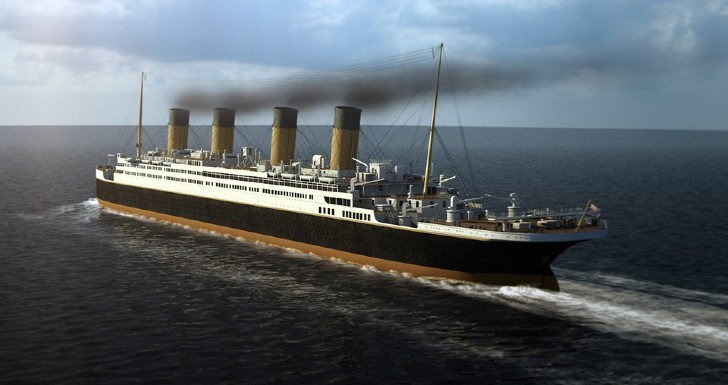
# **TITANIC: JACK e os DADOS**

## Desafio Kaggle

Olá, me chamo Erion Maia, e este *notebook* será desenvolvido por mim, em meus estudos em *Data Science* visando atender ao desafio do *site* [Kaggle](https://www.kaggle.com).

O desafio consiste em, com base nos *datasets* disponíveis no *site* [Kaggle](https://www.kaggle.com), "usar machine learning* para criar um modelo que possa prever quais passageiros sobreviveram ao naufrágio do Titanic" (traduzido do site).

Este desafio do [Kaggle](https://www.kaggle.com) é uma das competições mais famosas, e funciona quase como um *Hello World* (O tão conhecido código em Python que é escrito por 99,99% dos iniciantes).

## **INTRODUÇÃO**

Quase todo mundo conhece a (triste) história do naufrágio do navio Titanic. Ele era considerado, na época, o navio mais moderno do mundo e, segundo seus construtores, possuía tecnologia de ponta, era considerado, inclusive, como inafundável.

resumidamente, o TITANIC era um navio de passageiros britânico, operado pela White Star Line, e construído pelo estaleiros da Harland and Wolff, em Belfast, cujos projetistas eram os Engenheiros Navais Alexander Carlisle e Thomas Andrews.

Sua construção levou nada menos que 2 (dois) anos para ser concluído, iniciando em 1909 e o lançamento ao mar ocorreu em 1911 e custou, à época, U$ 7,5 Milhões de dólares, medindo 269 (duzentos e sessenta e nove) metros de comprimento, 28 (vinte e oito) metros de largura e 53 (cinquenta e três) metros de altura.

A embarcação partiu em viagem de Southtampton para Nova Iorque em 10 de abril de 1912, passando pela França e Irlanda. às 23h40 do dia 14 de abril de 1912 colidiu com um iceberg. Infelizmente em 15 de abril de 1912, após a colisão, **acabou naufragando e matando 1502 dos seus 2224 passageiros.**

Posteriormente descobriu-se que vários fatores culminaram no desastre que conhecemos hoje, como, por exemplo, atitudes irresponsáveis por parte da tripulação, o excesso de confiança dos mesmos, **mas principalmente a falta de botes salva-vidas para a tripulação e todos os passageiros.**

O fato é que boa parte daqueles que estavam a bordo sobreviveram, por sorte ou por outras razões, e é exatamente nest ponto que habita do desafio em voga. **Será que alguns passageiros tinham maior chance de sobreviver ao desastre?** Assim como no filme, mulheres e crianças tinham mais chances de sobreviver? De fato aqueles que estavam na 3ª classe tinham menos chance?

Esses são os questionamentos que tentaremos responder com o presente desafio e verificar, com base nos dados, e aplicando um algoritmo, se é possível determinar que um pasageiro da 1ª classe tinha mais chances que um passageiro da 3ª classe.

## **CHECKLIST**

1. Definição do problema;
2. Obtenção dos dados;
3. Exploração dos dados;
4. Preparação dos dados;
5. Construção do modelo preditivo; e
6. Avaliação;

### **1. Definição do Problema**

Como já dito nas linhas acima, o intuito do desafio é bem simples, descobrir, através de um modelo preditivo, quem sobreviveu ou não ao acidente.

Enquanto existe uma possibilidade de sorte na sobrvivência dos passageiros, parece que alguns grupos de pessoas parecia que tinha maior probabilidade de sobrevivência do que outros.

A descrição completa do desafio você pode ver na página do Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

Neste desafio, é pedido que **seja criado um modelo preditivo que responda a questão: "Que tipo de pessoas tinha maior probabilidade de sobreviver?"** usando os dados do passageiro (nome, idade, gênero, classe socio-econômica, etc).

### **2. Obtenção dos Dados**

Os dados são fornecidos pelo próprio site, no link que está disposto logo acima, e foram divididos em 2 (dois) *datasets*, sendo o *(train.csv)* e o *(test.csv)*.

PS.: Para poder baixar os dados é necessário estar logado no *site*, então, corra se faça a sua inscrição no site para poder ter acesso aos dados.

*   *Dataset* de Treino *(train.csv)*
  * Deve ser usado para construir o modelo de *Machine Learning*. Neste conjunto de dados é informado se o passageiro sobreviveu ou não.
  * Neste *Dataset* existem várias informações divididas em diversas categorias como gênero e classe de embarque.
*   *Dataset* de Teste *(test.csv)*
  * Este *Dataset* não possuí a informação se o passageiro sobreviveu ou não e deve ser utilizado após a criação do modelo preditivo visando verificar a **acurácia** do modelo.

Além disso é disponibilziado um "gabarito" de como as previsões devem ser enviadas para a plataforma do *site*.

### **3. Exploração dos Dados**

Os dados já foram baixados no site e colocados no *github*, agora, antes de iniciar a exploração dos dados, precisamos importar as bibliotecas que iremos utilizar.

Neste trabalho vamos trabalhar com as seguintes bibliotecas: **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** e **Missingno**.

Mãos à obra...

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Feito isso, agora devemos carregar os *datasets* para utilização.
Vamos armazenar cada um dos *datasets* em uma variável. Na variável **train** vamos carregar o *dataset* de treino. Na variável **test** vamos carregar o *dataset* de teste.

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/erionmaia/Sigmoidal_Data_Science/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/erionmaia/Sigmoidal_Data_Science/main/test.csv")

As bibliotecas foram importadas e os *datasets* já foram carregados.
Agora, vamos dar uma olhada no *dataset* de **treino**. Vamos ver quantas colunas e linhas ele possui e ainda ver as 5 (cinco) primeiras entradas.

In [ ]:
train.shape

(891, 12)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Podemos ver que o *dataset* possuí **891 linhas** e **12 colunas**.
Além disso podemos ver também, nas 5 (cinco) primeiras entradas, que as 12 (doze) colunas são: PassengerId, Survived, PClass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin e Embarked.

Vou colocar abaixo um índice descrevendo cada uma das colunas, para ficar mais fácil de compreender.

#### **Colunas**

* **PassengerId:** Número de identificação do passageiro dentro do *dataset*.
* **Survived:** Se o passageiro sobreviveu ou não. Aqui podemos ver que os dados estão em valores Booleanos, ou seja, Verdadeiro ou Falso, no caso entende-se da seguinte forma:
  * 0 = Não
  * 1 = Sim
* **PClass:** Classe do bilhete. No navio haviam 3 (três) classes, sendo:
  * 3 = 3ª Classe (Jack)
  * 2 = 2ª Classe
  * 1 = 1ª Classe (Rose)
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de irmãos e cônjuges a bordo.
* **Parch:** Quantidade de Pais/Filhos a bordo.
* **Ticket:** Número da passagem
* **Fare:** Valor pago pela passagem
* **Cabin:** Cabine do passageiro
* **Embaked:** Local de embarque. Existiam 3 (três) locais de embarque, eram eles:
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton

Olhando cada uma das colunas, e as informações contidas em cada uma delas, quais seriam os tipos de cada variável contida em cada coluna?

**Q1. Quais os tipos de cada variável?**

* Variáveis numéricas
  * Discretas
    * PClass
    * SibSp
    * Parch
  * Contínuas
    * Age
    * Fare
  * Alvo
    * Survived
  * Chave Primária
    * PassengerId
* Variáveis Categóricas
  * Name
  * Sex
  * Ticket
  * Cabin
  * Embarked

Isso é feito da seguinte forma:


In [ ]:
display(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Q2. Qual a porcentagem dos valores faltantes?**

In [ ]:
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

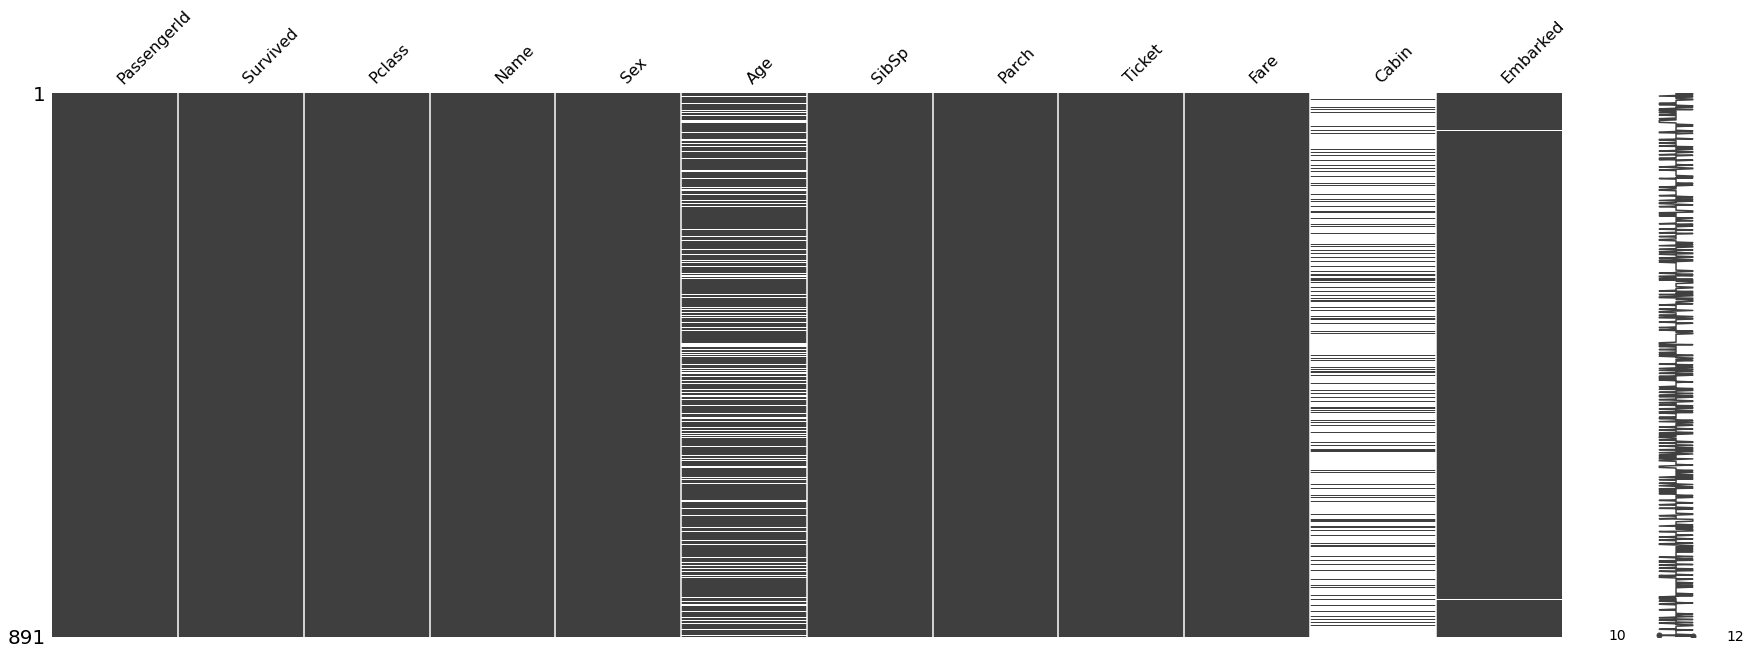

In [ ]:
msno.matrix(train, figsize=(30,10));

Vemos que as informações contidas na coluna **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Depois a coluna **Age** não possuí 20% dos seus valores. Por fim, a coluna **Embarked** possui apenas 2% das informações faltantes.

**Q3. Como é a distribuição dos dados**

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Como mostrado acima, na coluna **Age**, diferente das demais, possuí apenas 714 dados informados, contra 891 dos demais.
Vamos colocar agora os dados em histograma para uma melhor visualização.

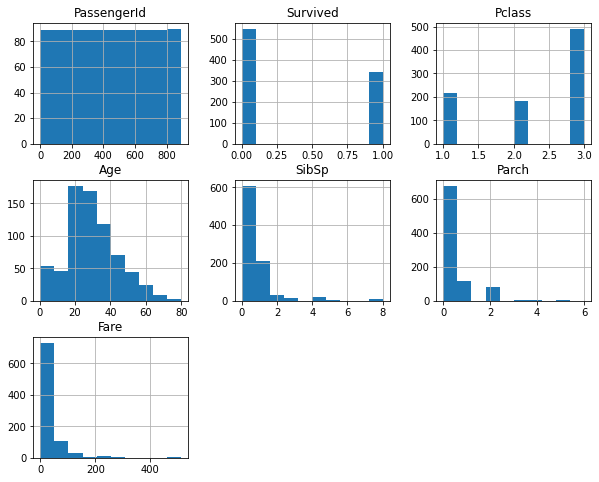

In [ ]:
train.hist(figsize=(10,8));

**Q4. Quais grupos de pessoas tinham mais chances de sobrevivência?**

Analisando apenas as informações até agora, apesar de vê-los com mais facilidade, não é possível afirmar, de forma simples e rápida, qual da conexão entre o fato de sobrevivência com as demais colunas.

Vamos tentar comparar então. Vamos começa pelo Sexo dos passageiros.

In [ ]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


E se a comparação for entre a variável de sobrevivente e a Classe?

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Verifiquemos então com idade...

In [ ]:
train[['Age', 'Survived']].groupby(['Age']).mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


Vamos tentar agora com a coluna Embarked.

In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Podemos ver que a coluna Age possuí muitos dados e a comparação não ficou de fácil compreensão, então vamos tentar plotar alguns gráficos para tentar analisar de uma forma melhor os dados que possuímos.

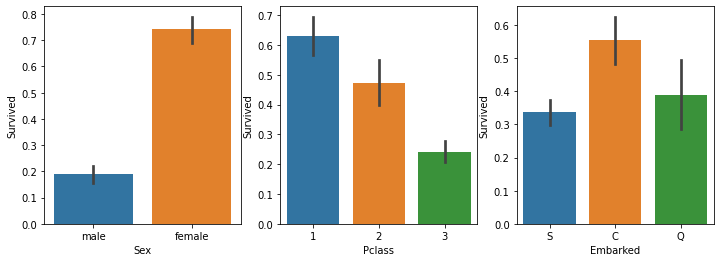

In [ ]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


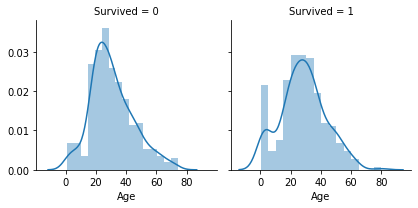

In [ ]:
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

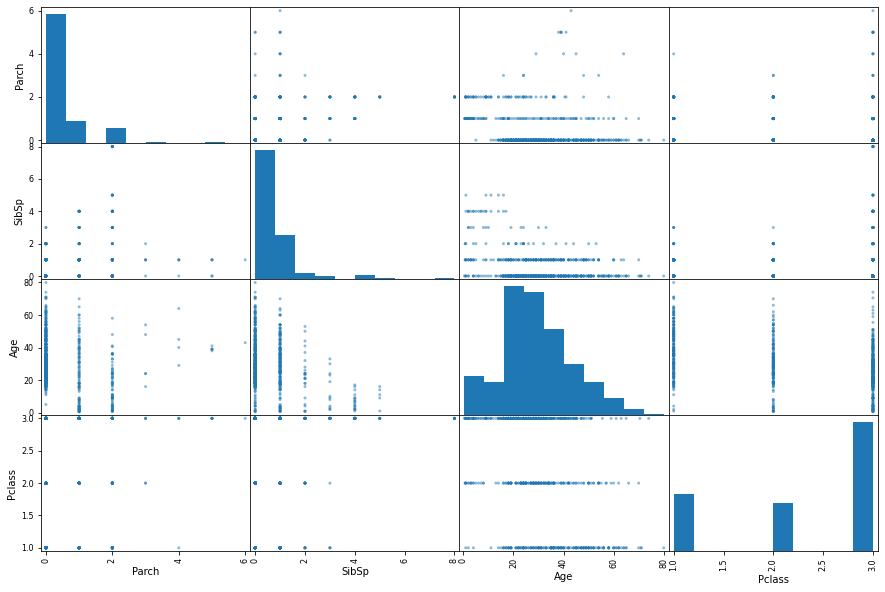

In [ ]:
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

Vamos plotar o *heatmap* para verificarmos melhor a correlação entre as variáveis numéricas.

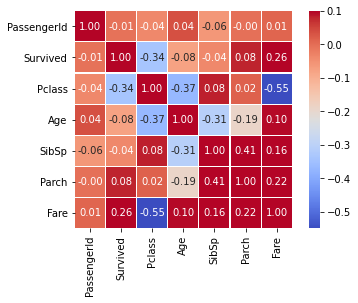

In [ ]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=0.1, square=True, linecolor='white', annot=True);

Vamos tentar uma nova abordagem. Pouca gente sabe, mas o método *.describe()* pode ser usado também para ver algo sobre a estastítica descritiva em colunas que não são números. Para isso, é só passar o argumento include=['O'].

In [ ]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Collyer, Mr. Harvey",male,347082,B96 B98,S
freq,1,577,7,4,644


Olhando os dados acima, podemos observar que:

* Os valores para *Name* são únicos, ou seja, um para cada pessoa;
* Na coluna *Embarked* temos apenas 2 valores faltando;
* Não há *missing values* para *Name* e *Sex*;
* Existem apenas os sexos *Male* (Masculino) e *Female* (Feminino), sendo que o sexo Masculino aparece com maior frequência (65% = 577/891);
* O Porto no qual embarcaram mais passageiros é o de Southampton.

### **4. Preparação dos Dados**

Até aqui o trabalho foi, resumidamente, importar as bibliotecas e os dados para o *DataFrame*, formular algumas hipóteses, iniciar uma análise exploratória superficial dos dados verificando algumas correlações entre determinadas variáveis.

Mas para continuar devemos fazer algumas mudanças nos nossos *datasets* para que possamos preparar os dados.

**Juntando os *datasets* de treino e teste**

Uma dica que aprendi no meu curso do [Sigmoidal](https://www.sigmoidal.ai), é que quando você vai preparar os dados para um modelo de *Machine Learning* é juntar os *datasets* de treino e teste em um único, e separar novamente no final.

Muitas das vezes será preciso fazer um *feature engineering*, criar variáveis *dummy* ou codificar as variáveis. Daí, nosso modelo vai ser treinado em cima dessa arquitetura, e os dados de teste vao ter que seguir essa mesma estrutura.

por isso, é muito mais fácil fazer todas as etapas para um único *DataFrame* e dividir novamente entre treino e teste.

In [ ]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


**Selecionar as *Features***

Como qualquer conjunto de dados do mundo real, você vai se deparar sempre com dados que não servem para nada e outros que não tem peso ou significância nenhuma no seu modelo.

Muitas vezes nosso julgamente pode ser equivocado, mas infelizmente é papel seu como cientista de dados, escolher quais *features* serão usadas para o modelo de *Machine Learning*.

Como vimos na análise exploratória acima, algumas colunas não influenciam no resultado final, por isso iremos desconsiderá-las ('PassengerId', 'Name', 'Ticket', 'Cabin').

In [ ]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Portanto, permanecem no nosso *dataset* apenas as variáveis ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'].

**Valores faltantes**

Quando estavamos explorando nosso *dataset*, pudemos perceber que haviam alguns itens faltantes em algumas variáveis.

Nestes casos, há 2 abordagens que são as mais utilizadas quando a gente encontra *missing values*:

* Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); e
* Excluir a linha inteira.

Cada caso é um caso e novamente, enquanto Cientista de Dados, é você quem vai tomar a decisão sobre qual passo a seguir.

Na maioria das vezes não é desejável jogar informação de uma linha inteira só por causa de um campo faltando. Sempre que possível é melhor você preencher o campo e é isso que vamos fazer.

In [ ]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Para as variáveis idade e tarifa adotaremos a estratégia de preencher as informações faltantes com o valor da mediana, e para a variável embarque, vamos preencher com o valor de maior frequência.

In [ ]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

**Preparar as variáveis para o modelo**

Como dito, não basta apenas a exploração dos dados e entender a correlação entre as variáveis, precisamos, para criar o modelo de *Machine Learning* preparar o *dataset* para trabalharmos com ele.

Considerando que o modelo matemático exige que trabalhemos com variáveis numéricas, significa que precisamos transformar os dados de entrada que estão em formato categórico para números.

Abaixo iremos converter os valores da variável *Sex* para ('male': 0, 'female': 1). Com a variável *Embarked* aplicaremos o conceito de variáveis dummies, e como elas assumem apenas os valores 0 e 1, precisamos então criar uma coluna para cada possibilidade da variável  categórica.

In [ ]:
# convertendo a variável 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# variáveis dummies para 'Embarked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


**Recuperando os datasets de treino e teste**

Acima nós pudemos preparar o *dataset* para que o modelo, agora, para melhor visuzalizarmos vamos retornar para os *datasets* anteriores, sendo *train* e *test*.

Isso (concatenação dos *datasets*) se deu em razão da possibilidade de erro e, ainda, seria um trabalho muito maior caso não fizessemos.

In [ ]:
# recuperar datasets de 'train' e 'test'
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

### **5. Construindo o Modelo**

Todo o cuidado, até agora, serviu para testar hipóteses e descartar dados desnecessários e redundantes.

Agora vamos mostrar que é possível criar e otimizar modelos de *Machine Learning* básicos. Aqui criaremos os seguintes modelos:

* Modelo de Regressão Logística
* Modelo de Árvore de Decisão

In [ ]:
# Impotando as bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

As bibliotecas foram importadas, agora vamos à criação do modelo e testá-lo.

In [ ]:
# criando o modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a precisão do modelo
acc_logreg = round(lr_model.score(train, target) * 100, 2)
print("A precisão do modelo de Regressão Logística é: {}".format(acc_logreg))

A precisão do modelo de Regressão Logística é: 80.13


Como você podem ver acima, o modelo de Regressão Logística criado possuí uma precisão de 80% nos dados treino.

Vamos tentar criar agora um modelo de Árvores de Decisão, para isso seguiremos os mesmos passos.

In [ ]:
# criando o modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a precisão do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("A precisão do modelo de Árvore de Decisão é: {}".format(acc_tree))

A precisão do modelo de Árvore de Decisão é: 82.72


Como este segundo modelo possui uma precisão maior, usaremos ele no Kaggle, então vamos agora transformar no arquivo para upload no *site*.

### **6. Avaliação**

Podemos criar um modelo de Árvore de Decisão que possui uma precisão de 82% e poderemos, agora, fazer o upload do nosso modelo no *site* e, assim, finalizar o primeiro desafio do [Kaggle](https://www.kaggle.com).

Posso dizer que não foi muito fácil, mas valeu a pena todo o esforço. Hoje já é o 5º dia seguido que trabalho neste projeto e concluir ele me deixa imensamente feliz.

In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({"PassengerId": passengerId, "Survived": y_pred_tree})

submission.to_csv('./submission_tree.csv', index=False)